### Figure 2
 

In [2]:
## packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib as mpl
import pandas as pd
import seaborn as sns

## All areas

In [3]:
# paths to load data
pathData = '../data/'
pathFln = '../data/Connectome/Kennedy.mat'

# Number of areas
Nareas=19
# Numver of trials
Ntrials=10

#### FLN

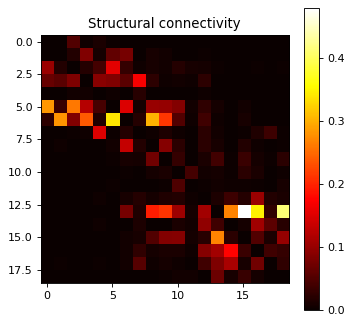

In [4]:
# Structural Connectivity
# Fln
# load FLNs
conn = loadmat(pathFln)
fln=conn['Fln']

# set figure size
fig=plt.figure(figsize=(5,5), dpi= 80, facecolor='w', edgecolor='k')

# remove right and top axis
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

# plot FLNs and define colormap
color_map =plt.imshow(fln)
color_map.set_cmap("hot")

# title for FLN plot
plt.title('Structural connectivity')
# show colorbar
cbar =plt.colorbar()
# define ticks
cbar.set_ticks(np.arange(0,0.5,0.1))


#### GPDC Total

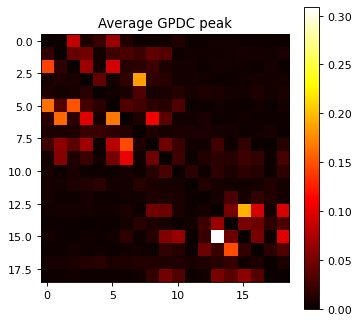

In [5]:
# Gpdc (Downsample 1kHz)

# matrix to store gpdc values
gpdcMatrixTotal=np.zeros((Nareas,Nareas,Ntrials)) #(i->j)


for i in range(Ntrials):
    #  load GPDC
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdc.npz')
    # gpdc values
    gpdc=data['arr_1']
    # take peak of gpdc 
    gpdcMatrixTotal[:,:,i]=np.max(gpdc[:,:,:],axis=2).T


# Set 0 to diagonal
np.fill_diagonal(gpdcMatrixTotal[:,:,4], 0)

# set figure size
fig=plt.figure(figsize=(5,5), dpi= 80, facecolor='w', edgecolor='k')

# remove right and top axis
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

# plot GPDC values
color_map =plt.imshow(gpdcMatrixTotal[:,:,4])
# define colormap
color_map.set_cmap("hot")
# define title 
plt.title('GPDC')
# plot colorbar
cbar =plt.colorbar()


#### FLN vs GPDC Total peak   (All FLN including those equal to zero)

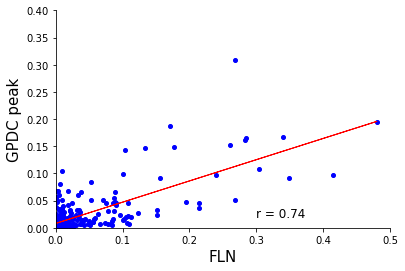

In [7]:
# define figure size
# fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

# remove right and top axis
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# correlation
listCorrelation=[]

# create data structure for scatter plot
for seed in range(Ntrials):

    # list to store FLN values
    listFln=[]
    # list to store GPDC values 
    listGpdc=[]
    
    for i in range(Nareas):
        for j in range(Nareas):
            if i!=j:

                listFln.append(fln[i,j])
                listGpdc.append(gpdcMatrixTotal[i,j,seed])
            else:
                gpdcMatrixTotal[i,j,seed]=0

    
    # # linear regression
    X = np.array(listFln)
    y = np.array(listGpdc)
    X = X.reshape(len(X), 1)
    y = y.reshape(len(y), 1)
    reg = LinearRegression().fit(X, y) 
    
    # Plot one case
    if seed==4:
        # Plot scatter plot
    
        plt.plot(listFln,listGpdc,'.b', markersize=8)

        plt.plot(X, reg.predict(X), color='red', linewidth=1)
        plt.text(0.3, 0.02, 'r = %0.2f' % np.sqrt(r2_score(y, reg.predict(X))),fontsize=12)
        plt.ylabel('GPDC peak',fontsize=15)
        plt.xlabel('FLN',fontsize=15)
        plt.xlim([0,0.5])
        plt.ylim([0,0.4])
    
    listCorrelation.append(np.sqrt(r2_score(y, reg.predict(X))))


#### Average correlation between FLN and GPDC

In [8]:
df=pd.DataFrame({'correlation':listCorrelation})

([<matplotlib.axis.YTick at 0x7f873c689510>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

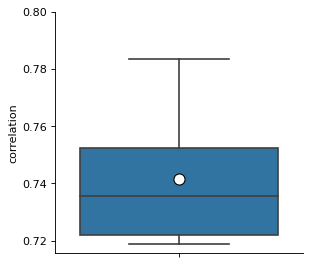

In [9]:
fig=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')
sns.boxplot(data=df,y='correlation',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yticks([0.72,0.74,0.76,0.78,0.80])